In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.optimize import least_squares
import pandas as pd
import glob

In [2]:

def concat_csvs_with_unique_events(files):
    """Load and concatenate CSV files with globally unique event IDs"""
    dfs = []
    offset = 0
    
    for file in files:
        df = pd.read_csv(file)
        df['event'] = df['event'] + offset  
        offset = df['event'].max() + 1      # Set offset for next file
        dfs.append(df)
    
    return pd.concat(dfs, ignore_index=True)


files = sorted(glob.glob('data/k_lambda_5x41_5000evt_*.mcpart_lambda.csv.zip'))

if len(files) == 0:
    print("Check the path and file name pattern.")
else:
    
    combined_df = concat_csvs_with_unique_events(files)
    combined_df.to_csv('combined_all_lambda_data.csv', index=False)
    
    print(f"\nThe combined data is saved in 'combined_all_lambda_data.csv'")

Check the path and file name pattern.


In [3]:
total = len(combined_df)
p_pi = combined_df['prot_id'].notna() & combined_df['pimin_id'].notna()
n_pi0 = combined_df['neut_id'].notna() & combined_df['pizero_id'].notna()

print(f"Λ⁰ → p + π⁻: {p_pi.sum():,} ({p_pi.sum()/total*100:.1f}%)")
print(f"Λ⁰ → n + π⁰: {n_pi0.sum():,} ({n_pi0.sum()/total*100:.1f}%)")

NameError: name 'combined_df' is not defined

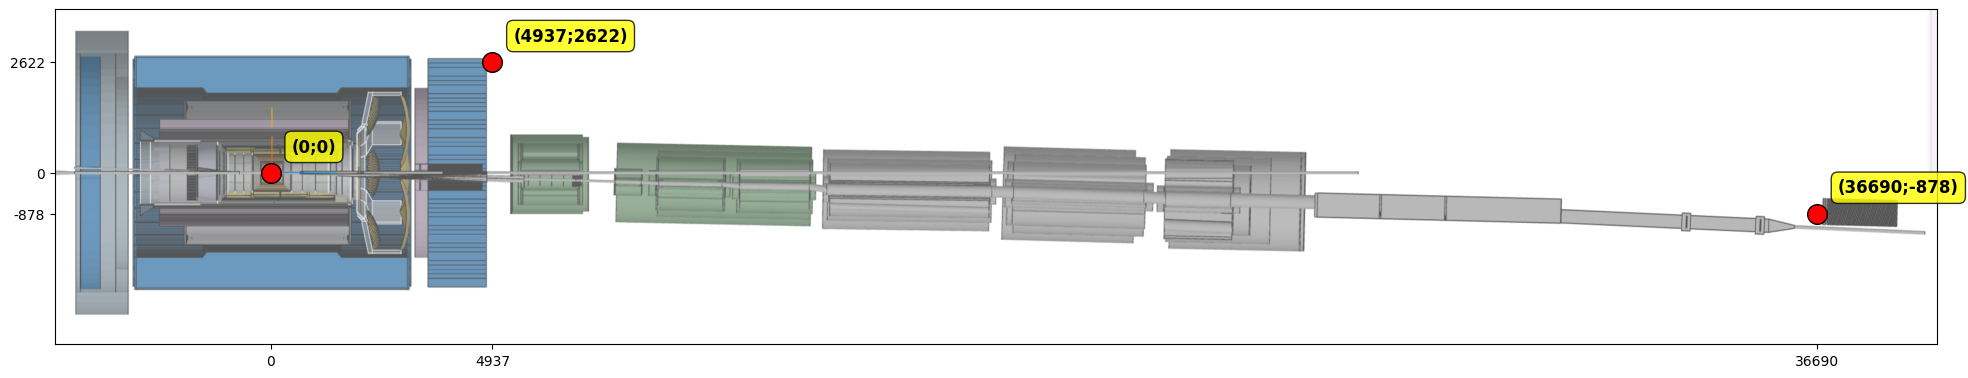

In [4]:

world_points = np.array([
    [0, 0],
    [4937, 2622],
    [36690, -878]
])
pixel_points_defined = np.array([
    [370, 280],
    [750, 90],
    [3020, 350]
])


img = mpimg.imread("vivaldi_3S0rjokoNL.png")
height, width = img.shape[:2]


def compute_affine_params(params):
    a, b, c, d, tx, ty = params
    predicted = []
    for (Y, Z) in world_points:
        x = a*Y + b*Z + tx
        y = c*Y + d*Z + ty
        predicted.append([x, y])
    return (np.array(predicted) - pixel_points_defined).flatten()

initial_params = [0.01, 0.001, 0.001, 0.01, 0, 0]
result = least_squares(compute_affine_params, initial_params, method="trf")
a, b, c, d, tx, ty = result.x


def world_to_pixel(Y, Z):
    x = a*Y + b*Z + tx
    y = c*Y + d*Z + ty
    return x, y


fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(img)


pixel_points = np.array([world_to_pixel(Y, Z) for Y, Z in world_points])
ax.scatter(pixel_points[:,0], pixel_points[:,1], color="red", s=200, edgecolor="black", marker='o', zorder=5)

for (Y, Z), (px, py) in zip(world_points, pixel_points):
    ax.annotate(f"({Y};{Z})", (px, py),
                xytext=(15, 15), textcoords="offset points",
                bbox=dict(boxstyle="round,pad=0.4", fc="yellow", alpha=0.8, ec="black"),
                fontsize=12, fontweight="bold", zorder=6)


x_ticks = pixel_points[:,0]
y_ticks = pixel_points[:,1]

x_labels = [f"{int(Y)}" for Y, Z in world_points]  
y_labels = [f"{int(Z)}" for Y, Z in world_points]  

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)

ax.set_xlim(0, width)
ax.set_ylim(height, 0)

ax.set_title("", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


In [ ]:


x = combined_df['lam_epx'].values  
y = combined_df['lam_epy'].values  
r = np.sqrt(x**2 + y**2)           

fig, ax = plt.subplots(figsize=(12, 6))


ax.scatter(x, r, color='green', s=5, label='R vs Z', alpha=0.2)

ax.set_xlabel('Z (lam_epx)', fontsize=14)
ax.set_ylabel('R = sqrt(x^2 + y^2)', fontsize=14)
ax.set_title('Graph of R vs Z', fontsize=16, fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
world_points = np.array([
    [0, 0],
    [4937, 2622],
    [36690, -878]
])
pixel_points_defined = np.array([
    [370, 280],
    [750, 90],
    [3020, 350]
])


img = mpimg.imread("vivaldi_3S0rjokoNL.png")
height, width = img.shape[:2]


def compute_affine_params(params):
    a, b, c, d, tx, ty = params
    predicted = []
    for (Y, Z) in world_points:
        x = a*Y + b*Z + tx
        y = c*Y + d*Z + ty
        predicted.append([x, y])
    return (np.array(predicted) - pixel_points_defined).flatten()

initial_params = [0.01, 0.001, 0.001, 0.01, 0, 0]
result = least_squares(compute_affine_params, initial_params, method="trf")
a, b, c, d, tx, ty = result.x


def world_to_pixel(Y, Z):
    x = a*Y + b*Z + tx
    y = c*Y + d*Z + ty
    return x, y

def pixel_to_world(x, y):
    det = a*d - b*c
    Y = (d*(x - tx) - b*(y - ty)) / det
    Z = (-c*(x - tx) + a*(y - ty)) / det
    return Y, Z


x_data = combined_df['lam_epx'].values  # Z
y_data = combined_df['lam_epy'].values
r_data = np.sqrt(x_data**2 + y_data**2)  # R


fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(img)


pixel_points = np.array([world_to_pixel(Y, Z) for Y, Z in world_points])
ax.scatter(pixel_points[:,0], pixel_points[:,1], color="red", s=200, edgecolor="black", marker='o', zorder=5)


for (Y, Z), (px, py) in zip(world_points, pixel_points):
    ax.annotate(f"({Y};{Z})", (px, py),
                xytext=(15, 15), textcoords="offset points",
                bbox=dict(boxstyle="round,pad=0.4", fc="yellow", alpha=0.8, ec="black"),
                fontsize=12, fontweight="bold", zorder=6)


num_ticks = 6
px0, py0 = world_to_pixel(0, 0)


x_min, x_max = min(pixel_points[:,0]), max(pixel_points[:,0])
x_range = x_max - x_min
x_pixel_ticks = np.linspace(x_min - 0.1*x_range, x_max + 0.1*x_range, num_ticks)
x_labels = [f"{pixel_to_world(x, py0)[0]:.0f}" for x in x_pixel_ticks]


y_min, y_max = min(pixel_points[:,1]), max(pixel_points[:,1])
y_range = y_max - y_min
y_pixel_ticks = np.linspace(y_min - 0.1*y_range, y_max + 0.1*y_range, num_ticks)
y_labels = [f"{pixel_to_world(px0, y)[1]:.0f}" for y in y_pixel_ticks]

ax.set_xticks(x_pixel_ticks)
ax.set_xticklabels(x_labels)
ax.set_yticks(y_pixel_ticks)
ax.set_yticklabels(y_labels)


ax.set_xlim(0, width)
ax.set_ylim(height, 0)  # чтобы Y росло вверх

# Сетка
ax.grid(True, linestyle='--', alpha=0.5)


overlay_pixels = np.array([world_to_pixel(R, Z) for R, Z in zip(r_data, x_data)])
ax.scatter(overlay_pixels[:,0], overlay_pixels[:,1], color="green", s=5, alpha=0.1, zorder=4, label="R vs Z")


ax.legend()
plt.tight_layout()
plt.show()
